원래 데이터 이름 : LTC_3rd_ORIGIN_LTCONLINE_20200101000000

변경 후 이름 : OnlineCard

datalink : https://bdp.kt.co.kr/invoke/SOKBP2603/?goodsCode=LTCONLINE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pwd

'G:\\내 드라이브\\Github\\Stat_Bigdata_analysis_Competition_2022\\2022-1'

In [4]:
OnlineCard = pd.read_csv('G:/내 드라이브/Github/Stat_Bigdata_analysis_Competition_2022/2022-1/Data/외부/OnlineCard.csv')

In [5]:
OnlineCard

,stdr_ym,sexdstn_code,agrde_code,setle_cascnt,setle_amount
0,202001,1,1,3489,150489282
1,202001,1,2,466844,20042144641
2,202001,1,3,1743723,94761937600
3,202001,1,4,1839903,112582296308
4,202001,1,5,790776,54161159716
...,...,...,...,...,...
163,202012,2,3,4825273,195119768007
164,202012,2,4,6357764,288099668333
165,202012,2,5,3201625,171305216361
166,202012,2,6,960499,62240998658


In [6]:
OnlineCard.columns = ['month', 'sex', 'age', 'paycnt', 'payamount']

20대를 기준으로 비교해보았다.

In [7]:
OnlineCard = OnlineCard.loc[OnlineCard['age']==2, ]

In [8]:
OnlineCard = OnlineCard.reset_index(drop=True)

남성과 여성을 합쳐준다.

In [9]:
even = [i for i in range(0, 23, 2)]

In [10]:
even

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

In [11]:
odd = [i for i in range(1, 24, 2)]

In [12]:
odd

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

In [13]:
pay = OnlineCard.loc[even]['paycnt'].reset_index(drop=True) + OnlineCard.loc[odd]['paycnt'].reset_index(drop=True)

In [14]:
amount = OnlineCard.loc[even]['payamount'].reset_index(drop=True) + OnlineCard.loc[odd]['payamount'].reset_index(drop=True)

In [15]:
OnlineCard.loc[odd]

,month,sex,age,paycnt,payamount
1,202001,2,2,861300,35071475108
3,202002,2,2,892979,34215251876
5,202003,2,2,993222,36889468848
7,202004,2,2,925090,35319404030
9,202005,2,2,955466,36332534543
11,202006,2,2,1016554,39699868478
13,202007,2,2,1045653,40722148556
15,202008,2,2,1070657,39649976813
17,202009,2,2,1068308,41124609341
19,202010,2,2,1050011,40105925423


In [16]:
OnlineCard = OnlineCard.loc[odd].reset_index(drop=True)
OnlineCard['paycnt'] = pay
OnlineCard['payamount'] = amount

In [17]:
OnlineCard = OnlineCard.drop('sex', axis=1)

In [18]:
OnlineCard = OnlineCard.drop([6,7,8,9,10,11])

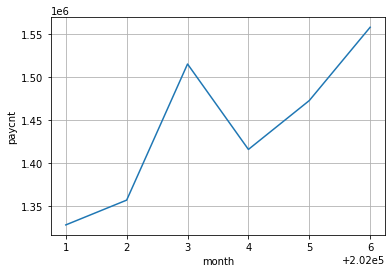

In [19]:
fig1, ax1 = plt.subplots()
sns.lineplot(ax=ax1, x="month", y="paycnt", data=OnlineCard)
ax1.grid()

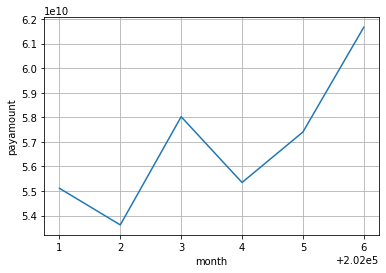

In [20]:
fig1, ax1 = plt.subplots()
sns.lineplot(ax=ax1, x="month", y="payamount", data=OnlineCard)
ax1.grid()

---

http://digitalchosun.dizzo.com/site/data/html_dir/2018/08/09/2018080912426.html

성인남녀 10명 중 9명은 스트레스 해소를 위해 지출을 하는 감정소비를 하고 있다고 답했다. 최근 홧김에 충동적으로 소비를 하는 '홧김비용', 소소하게 낭비하는 재미 ‘탕진잼’ 등 소비를 통해 심리적 안정을 얻는 감정소비와 관련된 신조어가 유행하고 있다. 감정소비를 하는 이유와 돈을 지출하는 품목, 감정소비에 대한 인식을 살펴보자.

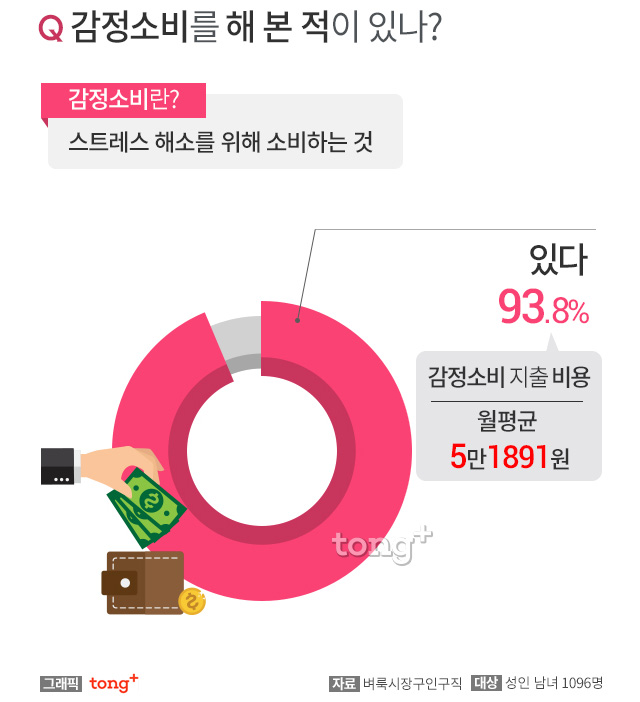